In [76]:
import pandas as pd


In [77]:
Airlines =pd.read_excel(r"C:\Users\CHARAN\Downloads\Airlines+Data.xlsx")

In [78]:
Airlines

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


<Axes: >

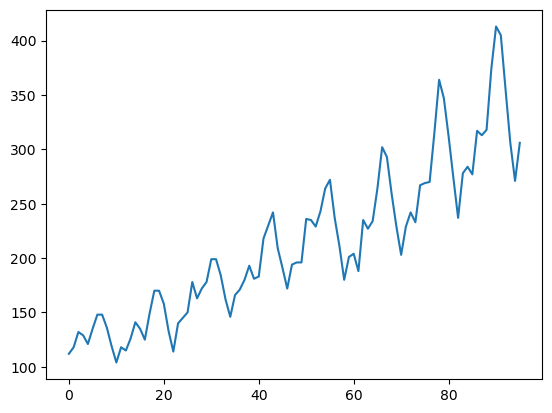

In [79]:
import matplotlib.pyplot as plt
Airlines.Passengers.plot()

In [80]:
# Data preprocessing / Creating Dummy Variables

## Same as encoder
import numpy as np

month =['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

Airlines['Month'] = pd.to_datetime(Airlines['Month'])

Airlines["Month_Year"] = Airlines['Month'].dt.strftime("%b-%y")

P = Airlines["Month_Year"][0]
P[0:3]

Airlines["Months"] = 0


for i in range(96):
    Airlines.loc[i, 'Months'] = Airlines.loc[i, 'Month_Year'][0:3]

month_dummies = pd.DataFrame(pd.get_dummies(Airlines['Months']))
month_dummies


Airlines1 = pd.concat([Airlines,month_dummies],axis = 1)

Airlines1.rename(columns={"Month": 'Date'}, inplace=True)
Airlines1["Year"] = Airlines1.Date.dt.strftime("%Y") # year extraction
Airlines1


,Date,Passengers,Month_Year,Months,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Year
0,1995-01-01,112,Jan-95,Jan,False,False,False,False,True,False,False,False,False,False,False,False,1995
1,1995-02-01,118,Feb-95,Feb,False,False,False,True,False,False,False,False,False,False,False,False,1995
2,1995-03-01,132,Mar-95,Mar,False,False,False,False,False,False,False,True,False,False,False,False,1995
3,1995-04-01,129,Apr-95,Apr,True,False,False,False,False,False,False,False,False,False,False,False,1995
4,1995-05-01,121,May-95,May,False,False,False,False,False,False,False,False,True,False,False,False,1995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,Aug-02,Aug,False,True,False,False,False,False,False,False,False,False,False,False,2002
92,2002-09-01,355,Sep-02,Sep,False,False,False,False,False,False,False,False,False,False,False,True,2002
93,2002-10-01,306,Oct-02,Oct,False,False,False,False,False,False,False,False,False,False,True,False,2002
94,2002-11-01,271,Nov-02,Nov,False,False,False,False,False,False,False,False,False,True,False,False,2002


In [81]:
import numpy as np
Airlines1["t"]=np.arange(1,97)

Airlines1["t_square"]=np.square(Airlines1["t"])

Airlines1["Log_Passengers"]=np.log(Airlines1["Passengers"])

Airlines1


,Date,Passengers,Month_Year,Months,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Year,t,t_square,Log_Passengers
0,1995-01-01,112,Jan-95,Jan,False,False,False,False,True,False,False,False,False,False,False,False,1995,1,1,4.718499
1,1995-02-01,118,Feb-95,Feb,False,False,False,True,False,False,False,False,False,False,False,False,1995,2,4,4.770685
2,1995-03-01,132,Mar-95,Mar,False,False,False,False,False,False,False,True,False,False,False,False,1995,3,9,4.882802
3,1995-04-01,129,Apr-95,Apr,True,False,False,False,False,False,False,False,False,False,False,False,1995,4,16,4.859812
4,1995-05-01,121,May-95,May,False,False,False,False,False,False,False,False,True,False,False,False,1995,5,25,4.795791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,Aug-02,Aug,False,True,False,False,False,False,False,False,False,False,False,False,2002,92,8464,6.003887
92,2002-09-01,355,Sep-02,Sep,False,False,False,False,False,False,False,False,False,False,False,True,2002,93,8649,5.872118
93,2002-10-01,306,Oct-02,Oct,False,False,False,False,False,False,False,False,False,False,True,False,2002,94,8836,5.723585
94,2002-11-01,271,Nov-02,Nov,False,False,False,False,False,False,False,False,False,True,False,False,2002,95,9025,5.602119


<Axes: >

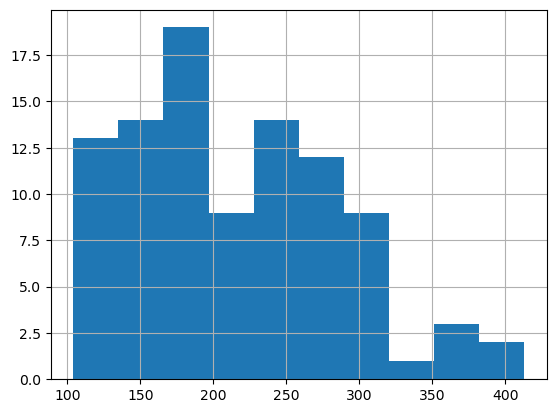

In [82]:
Airlines1.Passengers.hist()

<Axes: xlabel='Months', ylabel='Year'>

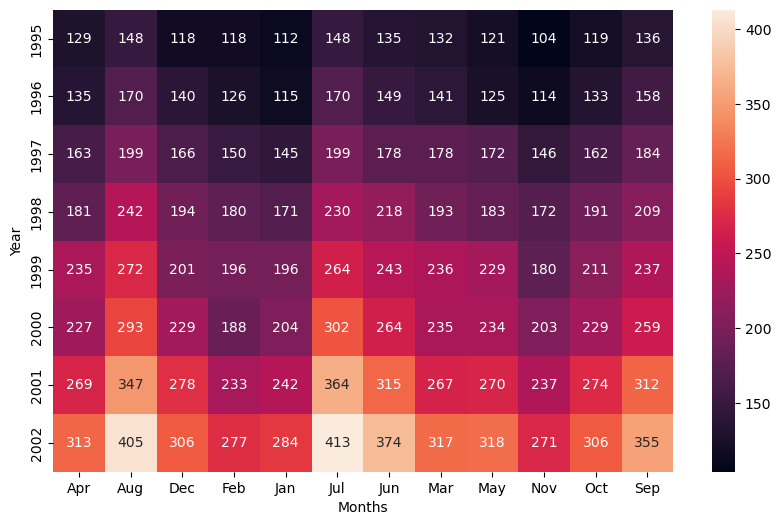

In [83]:
#EDA
import seaborn as sns

#Heat Map
plt.figure(figsize=(10,6))
Y_Quarter=pd.pivot_table(data=Airlines1,values="Passengers",index="Year",columns="Months",aggfunc="mean",fill_value=0)
sns.heatmap(Y_Quarter,annot=True,fmt="2g")

<Axes: ylabel='Density'>

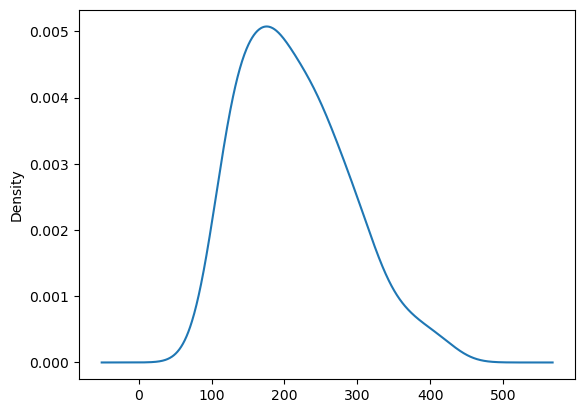

In [84]:
#Density plot and Lag plot
Airlines1.Passengers.plot(kind='kde')

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

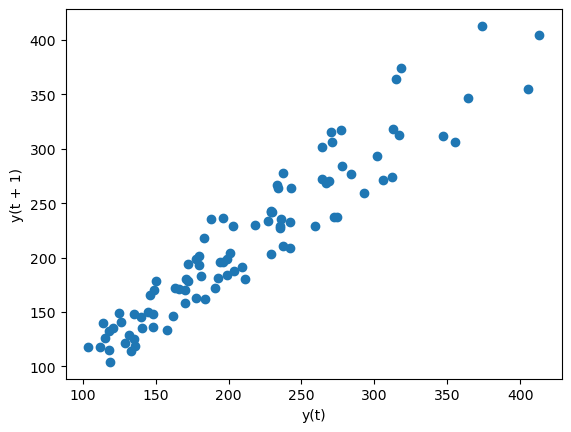

In [85]:
# scatter plot
from pandas.plotting import lag_plot
lag_plot(Airlines1.Passengers)

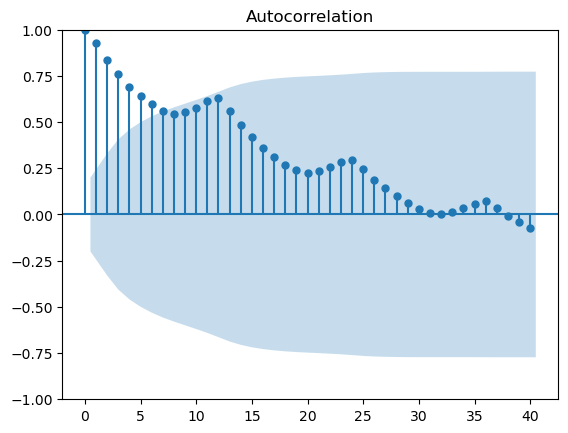

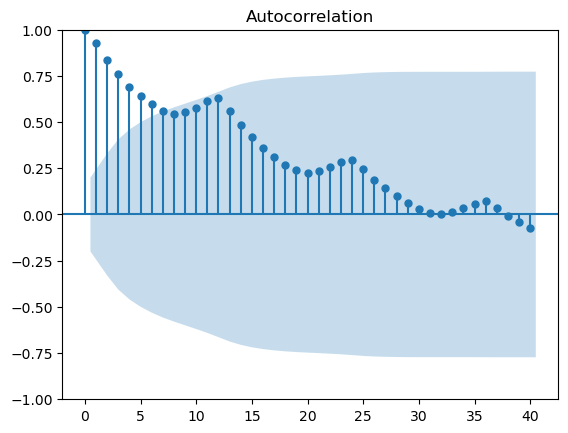

In [86]:


# create an autocorrelation plot
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(Airlines1.Passengers,lags=40)


<Axes: xlabel='Year', ylabel='Passengers'>

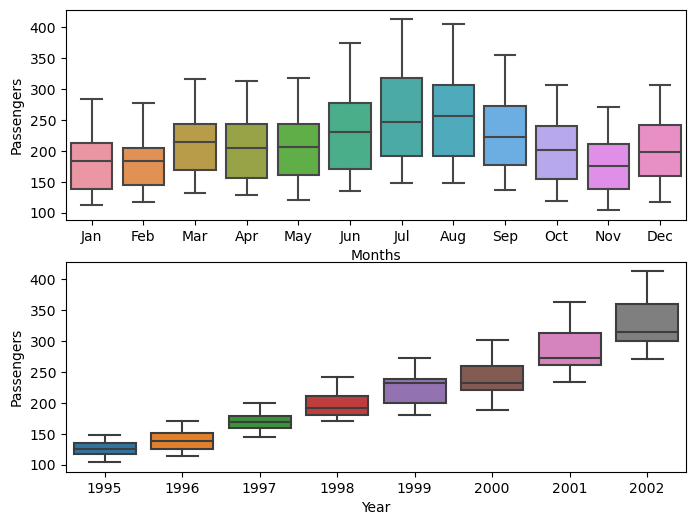

In [87]:
# Boxplot for ever
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x="Months",y="Passengers",data=Airlines1)

plt.subplot(212)
sns.boxplot(x="Year",y="Passengers",data=Airlines1)

     

<Axes: xlabel='Months', ylabel='Passengers'>

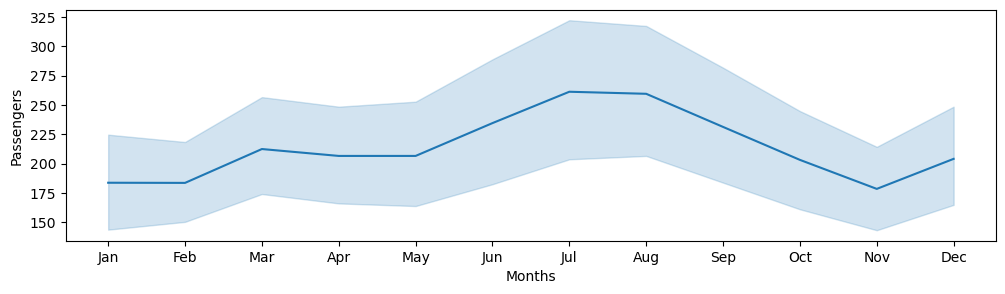

In [88]:

#Line Plot
plt.figure(figsize=(12,3))
sns.lineplot(x="Months",y="Passengers",data=Airlines1)

In [89]:

train=Airlines1.head(int(len(Airlines1.Date)*0.9))
test=Airlines1.tail(len(Airlines1.Date)-len(train.Date))
     

In [90]:
train

,Date,Passengers,Month_Year,Months,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Year,t,t_square,Log_Passengers
0,1995-01-01,112,Jan-95,Jan,False,False,False,False,True,False,False,False,False,False,False,False,1995,1,1,4.718499
1,1995-02-01,118,Feb-95,Feb,False,False,False,True,False,False,False,False,False,False,False,False,1995,2,4,4.770685
2,1995-03-01,132,Mar-95,Mar,False,False,False,False,False,False,False,True,False,False,False,False,1995,3,9,4.882802
3,1995-04-01,129,Apr-95,Apr,True,False,False,False,False,False,False,False,False,False,False,False,1995,4,16,4.859812
4,1995-05-01,121,May-95,May,False,False,False,False,False,False,False,False,True,False,False,False,1995,5,25,4.795791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,2001-10-01,274,Oct-01,Oct,False,False,False,False,False,False,False,False,False,False,True,False,2001,82,6724,5.613128
82,2001-11-01,237,Nov-01,Nov,False,False,False,False,False,False,False,False,False,True,False,False,2001,83,6889,5.468060
83,2001-12-01,278,Dec-01,Dec,False,False,True,False,False,False,False,False,False,False,False,False,2001,84,7056,5.627621
84,2002-01-01,284,Jan-02,Jan,False,False,False,False,True,False,False,False,False,False,False,False,2002,85,7225,5.648974


In [91]:
test

,Date,Passengers,Month_Year,Months,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Year,t,t_square,Log_Passengers
86,2002-03-01,317,Mar-02,Mar,False,False,False,False,False,False,False,True,False,False,False,False,2002,87,7569,5.758902
87,2002-04-01,313,Apr-02,Apr,True,False,False,False,False,False,False,False,False,False,False,False,2002,88,7744,5.746203
88,2002-05-01,318,May-02,May,False,False,False,False,False,False,False,False,True,False,False,False,2002,89,7921,5.762051
89,2002-06-01,374,Jun-02,Jun,False,False,False,False,False,False,True,False,False,False,False,False,2002,90,8100,5.924256
90,2002-07-01,413,Jul-02,Jul,False,False,False,False,False,True,False,False,False,False,False,False,2002,91,8281,6.023448
91,2002-08-01,405,Aug-02,Aug,False,True,False,False,False,False,False,False,False,False,False,False,2002,92,8464,6.003887
92,2002-09-01,355,Sep-02,Sep,False,False,False,False,False,False,False,False,False,False,False,True,2002,93,8649,5.872118
93,2002-10-01,306,Oct-02,Oct,False,False,False,False,False,False,False,False,False,False,True,False,2002,94,8836,5.723585
94,2002-11-01,271,Nov-02,Nov,False,False,False,False,False,False,False,False,False,True,False,False,2002,95,9025,5.602119
95,2002-12-01,306,Dec-02,Dec,False,False,True,False,False,False,False,False,False,False,False,False,2002,96,9216,5.723585


In [92]:
#Linear Model
import numpy as np
import statsmodels.formula.api as smf
Linear_model=smf.ols("Passengers~t",data=train).fit()
pred_linear=Linear_model.predict(test["t"])
rmse_linear=np.sqrt(np.mean(test["Passengers"]-np.array(pred_linear))**2)
rmse_linear

36.34856361149116

In [93]:
#Exponential
exp_model=smf.ols("Log_Passengers~t",data=train).fit()
pred_exp_model=exp_model.predict(test["t"])
rmse_exp_model=np.sqrt(np.mean((test["Passengers"])-(np.array(pred_exp_model)))**2)
rmse_exp_model
     


332.0234293338548

In [94]:
#Quadratic
Quad=smf.ols("Passengers~t+t_square",data=train).fit()
pred_Quad=Quad.predict(test[["t","t_square"]])
rmse_Quad=np.sqrt(np.mean((test["Passengers"])-(np.array(pred_Quad)))**2)
rmse_Quad


27.18670287682924

In [95]:
#Additive seasonality
Add_sea=smf.ols("Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec",data=train).fit()
pred_add_sea=Add_sea.predict(test[["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]])
rmse_add_sea=np.sqrt(np.mean(test["Passengers"]-(np.array(pred_add_sea)))**2)
rmse_add_sea


134.92857142857133

In [96]:
#Additive Seasonality Quadratic
add_sea_quad=smf.ols("Passengers~t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec",data=train).fit()
pred_add_sea_quad=add_sea_quad.predict(test[["t","t_square","Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]])
rmse_add_sea_quad=np.sqrt(np.mean(test["Passengers"]-np.array((pred_add_sea_quad)))**2)
rmse_add_sea_quad

17.867248407432026

In [97]:
# Multiplicative Seasonality
mul_sea=smf.ols("Log_Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec",data=train).fit()
pred_Mult_sea=mul_sea.predict(test[["Log_Passengers","Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]])
rmse_Mult_sea=np.sqrt(np.mean(test["Passengers"]-(np.array(np.exp(pred_Mult_sea))))**2)
rmse_Mult_sea

142.41437402901585

In [98]:
#Multiplicative Additive Seasonality
mul_add_sea=smf.ols("Log_Passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec",data=train).fit()
pred_mul_add_sea=mul_add_sea.predict(test)
rmse_mul_add_sea=np.sqrt(np.mean(test["Passengers"]-(np.array(pred_mul_add_sea)))**2)
rmse_mul_add_sea


331.99428730249576

In [99]:


#Compare the results
data = {"MODEL":pd.Series(["rmse_linear","rmse_exp_model","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_mul_add_sea"]),
        "RMSE_Values":pd.Series([rmse_linear,rmse_exp_model,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_mul_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])


,MODEL,RMSE_Values
4,rmse_add_sea_quad,17.867248
2,rmse_Quad,27.186703
0,rmse_linear,36.348564
3,rmse_add_sea,134.928571
5,rmse_Mult_sea,142.414374
6,rmse_mul_add_sea,331.994287
1,rmse_exp_model,332.023429


# Q2

In [100]:
import pandas as pd

In [102]:
df =pd.read_excel(r"C:\Users\CHARAN\Downloads\CocaCola_Sales_Rawdata.xlsx")

In [103]:
df

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


<Axes: >

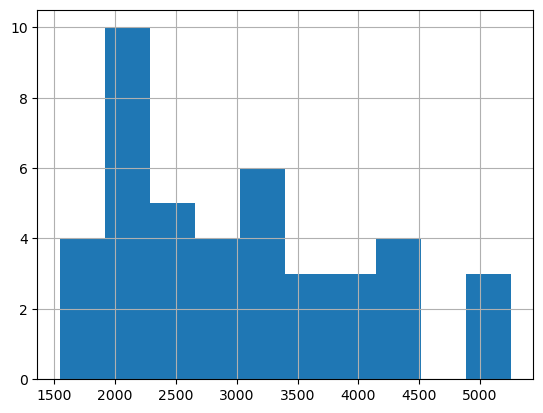

In [104]:
df.Sales.hist()

In [109]:
import numpy as np
Quarters=["Q1","Q2","Q3","Q4"]

p = df["Quarter"][0]
p[0:2]
df["quarter"]=0
df["Year"]=0

for i in range(42):
    p = df.loc[i, 'Quarter']
    df.loc[i,'quarter']= p[0:2]

for i in range(42):
    p = df.loc[i, 'Quarter']
    df.loc[i,'Year']= p[3:]

month_dummies =pd.get_dummies(df['quarter'])
month_dummies

,Q1,Q2,Q3,Q4
0,True,False,False,False
1,False,True,False,False
2,False,False,True,False
3,False,False,False,True
4,True,False,False,False
5,False,True,False,False
6,False,False,True,False
7,False,False,False,True
8,True,False,False,False
9,False,True,False,False


In [114]:
df_Dummy=pd.concat([df,month_dummies],axis=1)
df_Dummy

,Quarter,Sales,quarter,Year,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1,86,True,False,False,False
1,Q2_86,2244.960999,Q2,86,False,True,False,False
2,Q3_86,2533.804993,Q3,86,False,False,True,False
3,Q4_86,2154.962997,Q4,86,False,False,False,True
4,Q1_87,1547.818996,Q1,87,True,False,False,False
5,Q2_87,2104.411995,Q2,87,False,True,False,False
6,Q3_87,2014.362999,Q3,87,False,False,True,False
7,Q4_87,1991.746998,Q4,87,False,False,False,True
8,Q1_88,1869.049999,Q1,88,True,False,False,False
9,Q2_88,2313.631996,Q2,88,False,True,False,False


In [116]:
import numpy as np
df_Dummy["t"]=np.arange(1,43)
df_Dummy["t_square"]=np.square(df_Dummy["t"])
df_Dummy["Log_Sales"]=np.log(df_Dummy["Sales"])
df_Dummy

,Quarter,Sales,quarter,Year,Q1,Q2,Q3,Q4,t,t_square,Log_Sales
0,Q1_86,1734.827000,Q1,86,True,False,False,False,1,1,7.458663
1,Q2_86,2244.960999,Q2,86,False,True,False,False,2,4,7.716443
2,Q3_86,2533.804993,Q3,86,False,False,True,False,3,9,7.837477
3,Q4_86,2154.962997,Q4,86,False,False,False,True,4,16,7.675529
4,Q1_87,1547.818996,Q1,87,True,False,False,False,5,25,7.344602
5,Q2_87,2104.411995,Q2,87,False,True,False,False,6,36,7.651791
6,Q3_87,2014.362999,Q3,87,False,False,True,False,7,49,7.608058
7,Q4_87,1991.746998,Q4,87,False,False,False,True,8,64,7.596767
8,Q1_88,1869.049999,Q1,88,True,False,False,False,9,81,7.533186
9,Q2_88,2313.631996,Q2,88,False,True,False,False,10,100,7.746574


<Axes: >

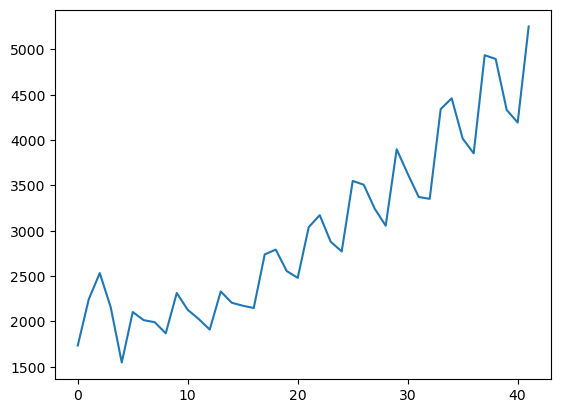

In [117]:
df_Dummy.Sales.plot()

<Axes: xlabel='quarter', ylabel='Year'>

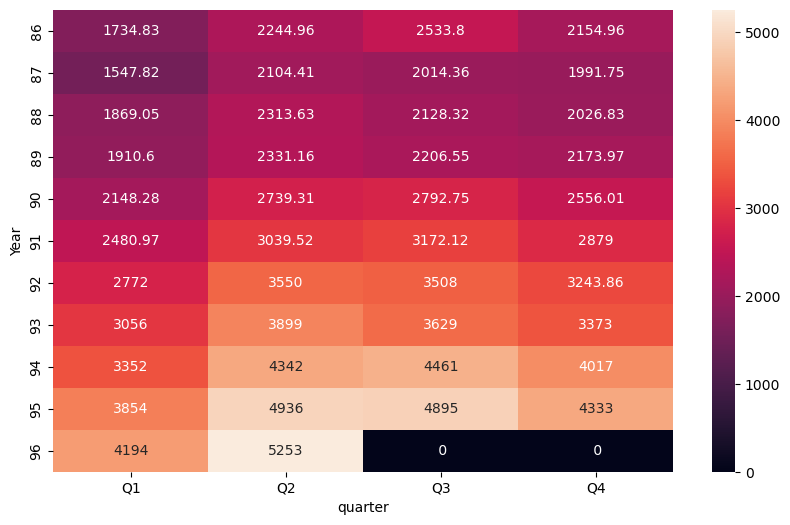

In [121]:
import seaborn as sns
plt.figure(figsize=(10,6))
Y_Quarter=pd.pivot_table(data=df_Dummy,values="Sales",index="Year",columns="quarter",aggfunc="mean",fill_value=0)
sns.heatmap(Y_Quarter,annot=True,fmt='2g')

<Axes: ylabel='Density'>

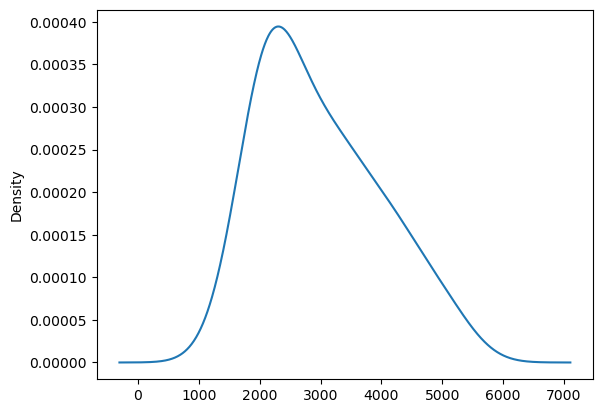

In [122]:
df_Dummy.Sales.plot(kind="kde")

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

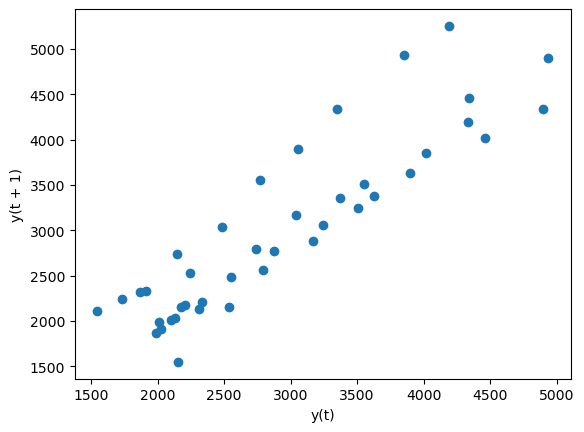

In [123]:
from pandas.plotting import lag_plot
lag_plot(df_Dummy.Sales)


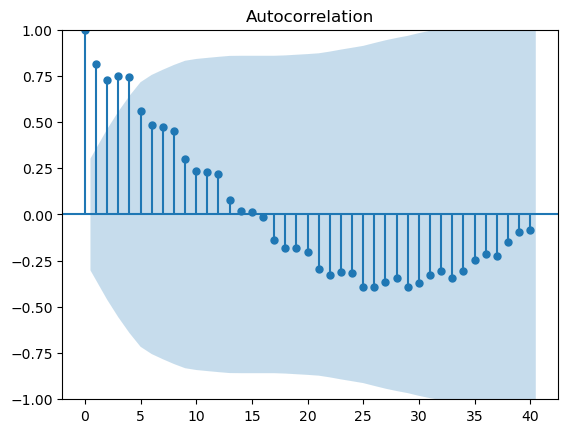

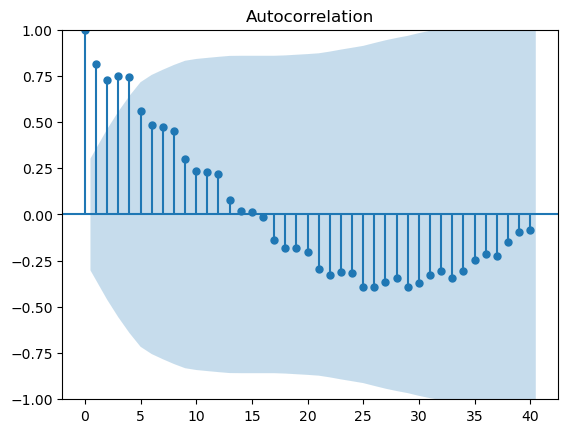

In [124]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df_Dummy.Sales,lags=40)

<Axes: xlabel='Year', ylabel='Sales'>

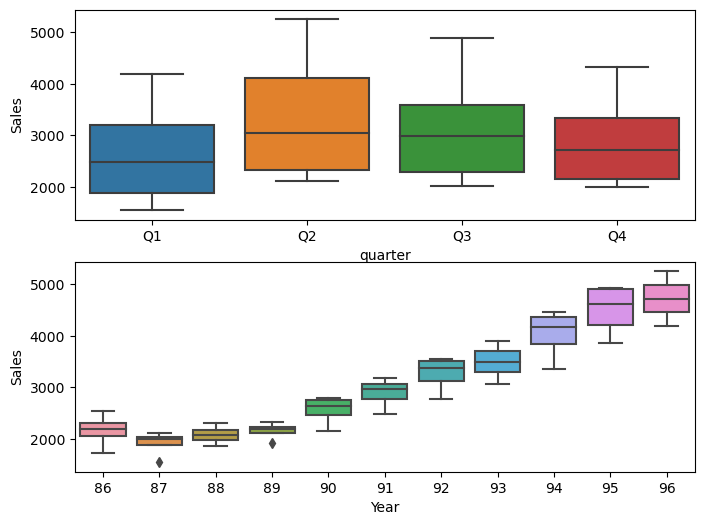

In [125]:
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x="quarter",y="Sales",data=df_Dummy)

plt.subplot(212)
sns.boxplot(x="Year",y="Sales",data=df_Dummy)

<Axes: xlabel='quarter', ylabel='Sales'>

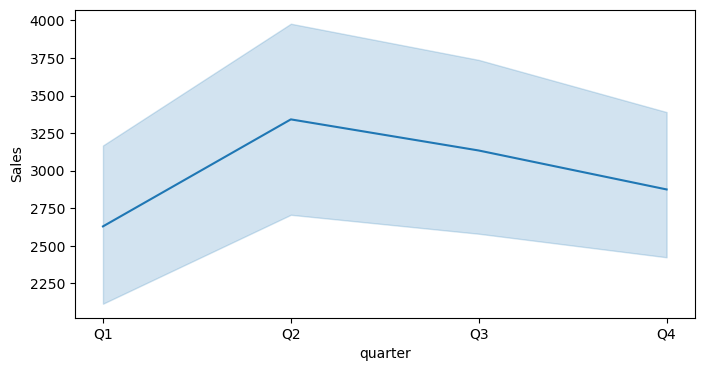

In [126]:
plt.figure(figsize=(8,4))
sns.lineplot(x="quarter",y="Sales",data=df_Dummy)

In [127]:
train=df_Dummy.head(int(len(df_Dummy.quarter)*0.9))
test=df_Dummy.tail(len(df_Dummy.quarter)-len(train))


In [128]:
train

,Quarter,Sales,quarter,Year,Q1,Q2,Q3,Q4,t,t_square,Log_Sales
0,Q1_86,1734.827000,Q1,86,True,False,False,False,1,1,7.458663
1,Q2_86,2244.960999,Q2,86,False,True,False,False,2,4,7.716443
2,Q3_86,2533.804993,Q3,86,False,False,True,False,3,9,7.837477
3,Q4_86,2154.962997,Q4,86,False,False,False,True,4,16,7.675529
4,Q1_87,1547.818996,Q1,87,True,False,False,False,5,25,7.344602
5,Q2_87,2104.411995,Q2,87,False,True,False,False,6,36,7.651791
6,Q3_87,2014.362999,Q3,87,False,False,True,False,7,49,7.608058
7,Q4_87,1991.746998,Q4,87,False,False,False,True,8,64,7.596767
8,Q1_88,1869.049999,Q1,88,True,False,False,False,9,81,7.533186
9,Q2_88,2313.631996,Q2,88,False,True,False,False,10,100,7.746574


In [129]:
test

,Quarter,Sales,quarter,Year,Q1,Q2,Q3,Q4,t,t_square,Log_Sales
37,Q2_95,4936.0,Q2,95,False,True,False,False,38,1444,8.504311
38,Q3_95,4895.0,Q3,95,False,False,True,False,39,1521,8.495970
39,Q4_95,4333.0,Q4,95,False,False,False,True,40,1600,8.374015
40,Q1_96,4194.0,Q1,96,True,False,False,False,41,1681,8.341410
41,Q2_96,5253.0,Q2,96,False,True,False,False,42,1764,8.566555


In [130]:
#Linear Model
import numpy as np
import statsmodels.formula.api as smf
Linear_model=smf.ols("Sales~t",data=train).fit()
pred_linear=Linear_model.predict(test["t"])
rmse_linear=np.sqrt(np.mean(test["Sales"]-np.array(pred_linear))**2)
rmse_linear

613.0885797796357

In [131]:
exp_model=smf.ols("Log_Sales~t",data=train).fit()
pred_exp_model=exp_model.predict(test["t"])
rmse_exp_model=np.sqrt(np.mean((test["Sales"])-(np.array(pred_exp_model)))**2)
rmse_exp_model


4713.8306396253665

In [133]:
#Quadratic
Quad=smf.ols("Sales~t+t_square",data=train).fit()
pred_Quad=Quad.predict(test[["t","t_square"]])
rmse_Quad=np.sqrt(np.mean((test["Sales"])-(np.array(pred_Quad)))**2)
rmse_Quad

37.603993337869

In [134]:
#Additive seasonality
Add_sea=smf.ols("Sales~Q1+Q2+Q3+Q4",data=train).fit()
pred_add_sea=Add_sea.predict(test[["Q1","Q2","Q3","Q4"]])
rmse_add_sea=np.sqrt(np.mean(test["Sales"]-(np.array(pred_add_sea)))**2)
rmse_add_sea

1916.793673290675

In [135]:
#Additive Seasonality Quadratic
add_sea_quad=smf.ols("Sales~t+t_square+Q1+Q2+Q3+Q4",data=train).fit()
pred_add_sea_quad=add_sea_quad.predict(test[["t","t_square","Q1","Q2","Q3","Q4"]])
rmse_add_sea_quad=np.sqrt(np.mean(test["Sales"]-np.array((pred_add_sea_quad)))**2)
rmse_add_sea_quad


108.68666897486109

In [136]:
# Multiplicative Seasonality
mul_sea=smf.ols("Log_Sales~Q1+Q2+Q3+Q4",data=train).fit()
pred_Mult_sea=mul_sea.predict(test[["Log_Sales","Q1","Q2","Q3","Q4"]])
rmse_Mult_sea=np.sqrt(np.mean(test["Sales"]-(np.array(np.exp(pred_Mult_sea))))**2)
rmse_Mult_sea

2009.5556325551393

In [137]:
#Multiplicative Additive Seasonality
mul_add_sea=smf.ols("Log_Sales~t+Q1+Q2+Q3+Q4",data=train).fit()
pred_mul_add_sea=mul_add_sea.predict(test)
rmse_mul_add_sea=np.sqrt(np.mean(test["Sales"]-(np.array(pred_mul_add_sea)))**2)
rmse_mul_add_sea

4713.803270264603

In [138]:
#Compare the results
data = {"MODEL":pd.Series(["rmse_linear","rmse_exp_model","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_mul_add_sea"]),
        "RMSE_Values":pd.Series([rmse_linear,rmse_exp_model,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_mul_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
2,rmse_Quad,37.603993
4,rmse_add_sea_quad,108.686669
0,rmse_linear,613.088580
3,rmse_add_sea,1916.793673
5,rmse_Mult_sea,2009.555633
6,rmse_mul_add_sea,4713.803270
1,rmse_exp_model,4713.830640
